In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.rcParams['font.size'] = 13
plt.rcParams['axes.spines.right'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.top'] = False

## Information as reduced uncertainty

The foundation for information theory differs slightly from many other concepts in physics, as it is not derived out of empirical observations. Rather, Shannon (1948) started from an intuition of what properties an information measure should posses, and then showed that there only exist one measure with those properties. In short, he imagined a situation where the probabilities ($p_1, \ldots, p_N$) for $N$ outcomes/answers to an event/question are known beforehand, and soughed to quantify the information obtained ones the outcome/answer was learned. 

For example, imagine a professor that wants to know how many students $x$ attended a specific lecture. The professor is assumed to know the distribution $p(x)$ over all possible number of attendants from previous experience, but the real number of attendants is unknown. The distribution $p(x)$ thus reflects current uncertainty, and ones the real number of attendees is learned, this uncertainty is decreased to zero. The basic idea is, therefore, to quantify the information learned by measuring how much the uncertainty has decreased.

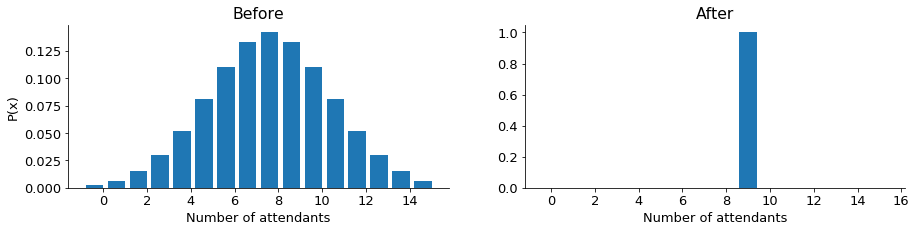

In [2]:
# Illustration of the uncertainty before and after
N = 16  # number of possible outcomes
mu = N/2.  # mean
sigma = N/4.  # standard deviation
x = np.arange(N)  # possible outcomes
p = np.exp(-(x-mu)**2/sigma**2)  # p(x)
p /= p.sum()  # Normalize

# One sample from p(x)
p_cum = np.cumsum(p)
outcome = np.argmax(np.random.rand() < p_cum)  
y = np.zeros(N)
y[outcome] = 1.

# Plotting
plt.figure(figsize=(15, 3))
ax = plt.subplot(1, 2, 1)
ax.bar(x-0.4, p)
ax.set_xlabel('Number of attendants')
ax.set_ylabel('P(x)')
ax.set_title('Before')
ax = plt.subplot(1, 2, 2)
ax.bar(x, y)
ax.set_xlabel('Number of attendants');
ax.set_title('After');

Based on the idea above, Shannon (1948) proposed that a measure $H(p_1,\ldots,p_N)$ of uncertainty should posses the following three properties:
1. $H$ should be continuous in the $p_i$.
2. If all the $p_i$ are equal, $p_i=1/N$, then $H$ should be a monotonically increasing function of $N$.
3. If a choice can be broken down into two successive choices, the original $H$ should be a weighted sum of the individual values of $H$. For example: $H(\frac{1}{2}, \frac{1}{3}, \frac{1}{6}) = H(\frac{1}{2}, \frac{1}{2}) + \frac{1}{2}H(\frac{2}{3}, \frac{1}{3})$.

***
```
   -----|-----               -----|-----
   |    |    |               |         |   
  1/2  2/6  1/6             1/2       1/2
                             |      ---|---
                             |      |     |
                             |     2/3   1/3
                             |      |     |
                            1/2    2/6   1/6
```
***
Shannon then moved on to shown that the only uncertainty measure that satisfies the above three properties is of the form:

$$
\begin{equation}
H=-\sum_i p_i \log(p_i), 
\end{equation}
$$

where the base of the logarithm determines the information unit (usually base two which corresponds to bits). See Shannon (1948) or Bialek (2012) for the proof. 

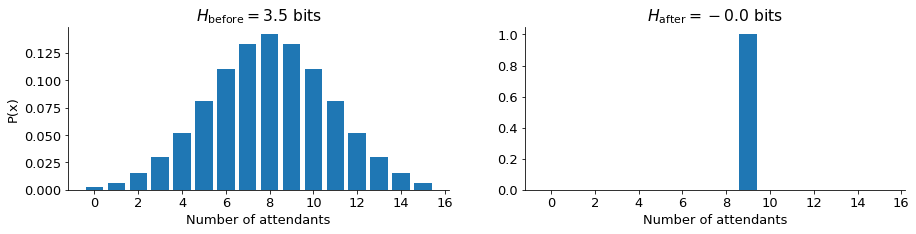

In [4]:
# Uncertanities before and after
H_before = -np.sum(p*np.log2(p))
H_after = -np.sum(y[y>0]*np.log2(y[y>0]))

# Plotting
plt.figure(figsize=(15, 3))
ax = plt.subplot(1, 2, 1)
ax.bar(x, p)
ax.set_ylabel('P(x)')
ax.set_title('$H_\mathrm{before} = %2.1f$ bits' % H_before)
ax.set_xlabel('Number of attendants')
ax = plt.subplot(1, 2, 2)
ax.bar(x, y)
ax.set_title('$H_\mathrm{after} = %2.1f$ bits' % H_after)
ax.set_xlabel('Number of attendants');

## Entropy as a measure of uncertainty

Shannon (1948) chose to denote the uncertainty measure by $H$, and he referred to it as entropy due to its connection with statistical mechanics.
> Quantities of the form $H=-\sum_i p_i \log(p_i)$ play a central role in information theory as measures of **information, choice, and uncertainty**. The form of $H$ will be recognized as that of entropy as defined in certain formulations of statistical mechanics where $p_i$ is the probability of a system being in cell $i$ of its phase space. $H$ is then, for example, the $H$ in Boltzman's famous $H$ theorem. We shall call $H=-\sum_i p_i \log(p_i)$ the entropy of the set of probabilities $p_1,\ldots,p_n$.

Although fascinating, this connection might, however, not be enough to provide an intuitive picture of which factors that lead to high or low entropies. In short, we can answer this second question by noting that 1) the entropy is always non-negative, 2) it increases with the number of possible outcomes, and 3) it obtains its maximum value for any fixed number of outcomes when all are equally likely.

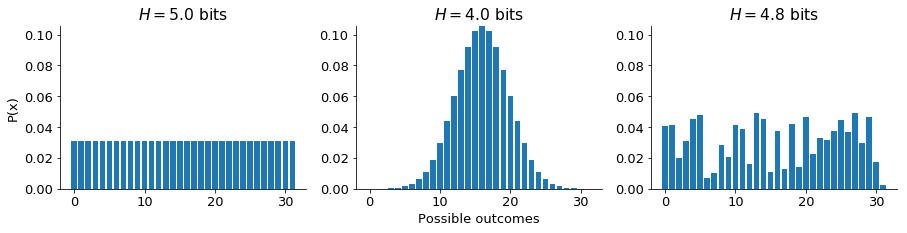

In [5]:
# Entropies for various example distributions
N = 32
mu = N/2.
sigma = N/6.
x = np.arange(N)

# Distributions
p_equal = 1./N*np.ones(N) 
p_normal = np.exp(-(x-mu)**2/sigma**2)
p_normal /= p_normal.sum()
p_random = np.random.rand(N)
p_random /= p_random.sum()
ps = [p_equal, p_normal, p_random]
p_max = np.hstack(ps).max()

# Plotting
plt.figure(figsize=(15, 3))
for idx, p in enumerate(ps, start=1):
    H = -np.sum(p*np.log2(p))
    ax = plt.subplot(1, len(ps), idx)
    ax.bar(x, p)
    ax.set_title('$H = %2.1f$ bits' % H)
    ax.set_ylim([0, p_max])
    if idx == 1:
        ax.set_ylabel('P(x)')
    elif idx == 2:
        ax.set_xlabel('Possible outcomes')
    

The entropy of a distribution, as presented above, can also be derived by searching for a minimum length code for denoting each outcome. That is, the entropy also represents a lower limit on how many bits one needs on average to encode each outcome. For example, imagine that $N=4$ and that the probabilities are: $p_1=0.5,\: p_2=0.25,\: p_3=0.125,\: p_4=0.125$. In this case, the minimum length codes would be:

| Outcome | Code |
|---------|:----:|
| 1       | 0    |
| 2       | 10   |
| 3       | 110  |
| 4       | 111  |

and the entropy (or average code length) $-0.5\log(0.5)-0.25\log(0.25)-2*0.125\log(0.125)=1.75$ bits. Bialek (2012) commented on this fact by writing:
>It is quite remarkable that the only way of quantifying how much we learn is to measure how much space is required to write it down.

Similarly, Bialek (2012) also provided the following link between entropy as a minimum length code and the amount of heat needed to heat up a room:
>Entropy is a very old idea. It arises in thermodynamics first as a way of keeping track of heat flows, so that a small amount of heat $dQ$ transferred at absolute temperature $T$ generates a change in entropy $dS=\frac{dQ}{T}$. Although there is no function $Q$ that measures the heat content of a system, there is a function $S$ that characterizes the (macroscopic) state of a system independent of the path to that state. Now we know that the entropy of a probability distribution also measures the amount of space needed to write down a description of the (microscopic) states drawn out of that distribution.

>Let us imagine, then, a thought experiment in which we measure (with some finite resolution) the positions and velocities of all gas molecules in a small room and types these numbers into a file on a computer. There are relatively efficient programs (gzip, or "compress" on a UNIX machine) that compress usch files to nearly their shortest possible length. If these programs really work as well as they can, then the length of the file tells us the entropy of the distribution out of which the numbers in the file are being drawn, but this is the entropy of the gas. Thus, if we heat up the room by 10 degreed and repeat the process, we will find that the resulting data file is longer. More profondly, if me measure the increase in the length of the file, we know the entropy change of the gas and hence the amount of heat that must be added to the room to increase the temperature. This connection between a rather abstract quantity (the length in bits of a computer file) and a very tangible physical quantity (the amount of heat added to a room) has long struck me as one of the more dramatic, if elementary, examples of the power of mathematics to unify descriptions of very disparate phenomena.

[Maxwell–Boltzmann distribution](https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution)

## Mutual information

Most situation are not as easy the example with the professor, where the uncertainty was removed in total once the answer was obtained. That is, in practice we often face situation where the uncertainty in only partially decreased. For example, imagine a situation where a bright spot is flashed on one out of 8 equally likely horizontally placed locations {$x \in [0, 1,\ldots, 7]$}, and where our information about which location that was lit up comes from a light detector placed at one of the locations. The detector further has three states {$y \in [0, 1, 2]$}, and it responds with state 2 if the spot is flashed on the location where it is located, state 1 if the spot is flashed at either of the two neighboring locations, and state 3 otherwise. Assuming that the detector is placed at location 3, then its response to a flash at any of the eight locations is as depicted below.



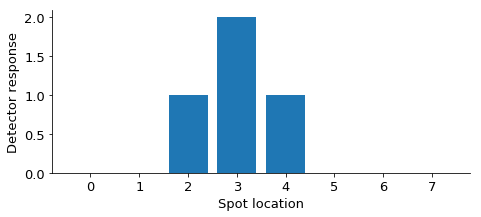

In [6]:
N = 8;  # Eight locations
placement = 3  # The detector's location
responses = np.zeros(N)  # Detector reponses at each location
responses[placement] = 2
responses[placement-1] = 1
responses[placement+1] = 1

# Plotting
plt.figure(figsize=(7.5, 3))
plt.bar(np.arange(N), responses)
plt.xlabel('Spot location')
plt.ylabel('Detector response');

If we now expand on the initial idea to define information as the entropy difference between before and after knowing the output of the detector, then we get:

$$
\begin{equation}
I(X;Y) = \sum_{i=0}^7 -p(x_i)\log p(x_i) - \sum_{j=0}^2 p(y_j) \sum_{i=0}^7 -p(x_i|y_j) \log p(x_i|y_j).
\end{equation}
$$

That is, from the initial uncertainty in flash spot location $\sum_{i=0}^7 -p(x_i)\log p(x_i)$, we subtract off the uncertainty that remains for each possible state of the detector $\sum_{i=0}^7 -p(x_i|y_j) \log p(x_i|y_j)$ weighted by its probability of occurrence $p(y_j)$. For the case described above, the relevant probability distributions and entropies are:

I=3.00 - 0.62*2.32 - 0.25*1.00 - 0.12*-0.00=1.30


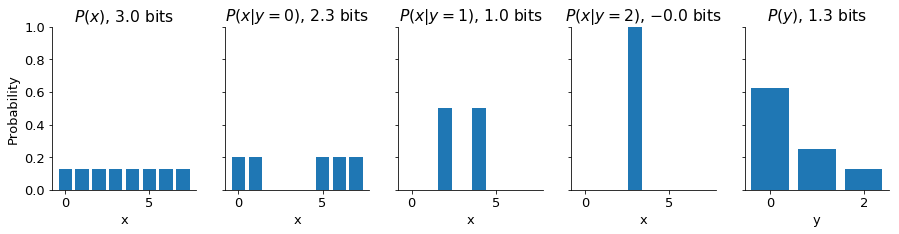

In [7]:
# Probability distributions
px = 1./N * np.ones(N)
px_y0 = np.zeros(N) + np.float64((responses == 0)) / (responses == 0).sum()
px_y1 = np.zeros(N) + np.float64((responses == 1)) / (responses == 1).sum()
px_y2 = np.zeros(N) + np.float64((responses == 2)) / (responses == 2).sum()
py = 1./N * np.array([(responses==r).sum() for r in np.unique(responses)])
ps = [px, px_y0, px_y1, px_y2, py]
titles = ['$P(x)$', '$P(x|y=0)$', '$P(x|y=1)$', '$P(x|y=2)$', '$P(y)$']

# Plotting
Hs = []
plt.figure(figsize=(15, 3))
for idx, p in enumerate(ps, start=1):
    H = -np.sum(p[p>0]*np.log2(p[p>0]))
    Hs.append(H)
    ax = plt.subplot(1, len(ps), idx)
    ax.bar(np.arange(len(p)), p)
    ax.set_ylim([0, 1])
    ax.set_title(titles[idx-1] + ', $%2.1f$ bits' % H)
    if idx < len(ps):
        ax.set_xlabel('x')
    else:
        ax.set_xlabel('y')
    if idx > 1:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('Probability')
        
# Calculate and write out the mutual information
mi = Hs[0] - py[0]*Hs[1] - py[1]*Hs[2] - py[2]*Hs[3]
print('I=%3.2f - %3.2f*%3.2f - %3.2f*%3.2f - %3.2f*%3.2f=%3.2f' % (Hs[0], py[0], Hs[1], py[1], Hs[2], py[2], Hs[3], mi))

By further replacing the summation limits with $x\in X$ and $y\in Y$, respectively, we obtain the more general expression:

$$
\begin{equation}
I(X;Y) = \sum_{x\in X} -p(x)\log p(x) - \sum_{y\in Y} p(y) \sum_{x\in X} -p(x|y) \log p(x|y) = H(X) - H(X|Y),
\end{equation}
$$

where $H(X|Y)$ is the conditional entropy (i.e., the average uncertainty that remains ones $y$ is known) and $I$ the mutual information between $X$ and $Y$. Mutual information is thus a generalization of the initial idea that we can quantify what we learn as the difference in uncertainty before and after. 

## Entropy, uncertainty or information 

Shannon (1948) actually emphasized a different interpretation than the one presented above. As he was interested in the case where a source sends information over a noisy channel to a receiver, he interpreted the entropy $H(X)$ in $I(X;Y) = H(X) - H(X|Y)$ as the information produced by the source instead of an uncertainty. This interpretation can be understood by noting that the entropy can both be seen as an initial uncertainty or as an upper bound on the information learned when $H(X|Y)$ is zero (a duality that sometimes leads to confusion, especially if mutual information is abbreviated to information only). And in a source and receiver scenario, the upper limit obviously denotes the amount of information sent (produced) by the source. These different interpretations might seem unnecessary at first, but they help in interpreting the symmetry of the mutual information measure. Starting from the expression of mutual information as given above, one can reformulate it as:

$$
\begin{align}
I(X;Y) &= \sum_{x\in X} -p(x)\log p(x) - \sum_{y\in Y} p(y) \sum_{x\in X} -p(x|y) \log p(x|y) = H(X) - H(X|Y), \quad\quad (1) \\
 &=-\sum_{x\in X}\sum_{y\in Y} p(x, y)\log p(x) + \sum_{y\in Y} \sum_{x\in X} p(x,y) \log p(x|y), \\
 &= \sum_{y\in Y} \sum_{x\in X} p(x,y) \log \frac{p(x|y)}{p(x)}, \\
 &= \sum_{y\in Y} \sum_{x\in X} p(x,y) \log \frac{p(x,y)}{p(x)p(y)} = \dots = H(X) + H(Y) - H(X,Y), \\
 &= \quad \vdots \\
I(Y;X) &= \sum_{y\in Y} -p(y)\log p(y) - \sum_{x\in X} p(x) \sum_{y\in Y} -p(y|x) \log p(y|x) = H(Y) - H(Y|X), \quad\quad (2) 
\end{align}
$$

Shannon interpreted these two descriptions as: (1) The information that was sent less the uncertainty of what was sent. (2) The amount of information received less the part which is due to noise. Observe that expression (2) two makes little sense for the detector example above if $H(Y)$ is interpreted as uncertainty, whereas it becomes clearer with the interpretation that Shannon's emphasized. From that point of view, expression (2) tells us that the mutual information is the information contained in the detector's response $H(Y)$ less the part that is due to noise $H(Y|X)$. However, as the detector is deterministic (no noise), we arrive at the conclusion that the mutual information should equal $H(Y)$ in our particular example, which it also does.

Additionally, we note that the mutual information has the following properties:
1. It is non-negative and equal to zero only when $x$ and $y$ are statistically independent, that is, when $p(x,y)=p(x)p(y)$.
2. It is bounded from above by either $H(X)$ or $H(Y)$, whichever is smaller.


## Mutual information as a general measure of correlation

As the mutual information is a measure of dependence between two random variables, it can also be understood in more familiar terms of correlations. To visualize this, imagine a joint distribution of two random variables ($X_1$ and $X_2$). Equation 1 and 2 above tells us that the mutual information can be obtained as either $H(X) - H(X|Y)$ or $H(Y) - H(Y|X)$. That is, the entropy of either marginal distribution less the conditional entropy. In more practical terms, this means that we subtract of the average uncertainty that remains ones either variable is known. And in even more practical terms, it corresponds to looking at individual rows or columns in the joint distribution, as these reflect the uncertainty that remains ones either variable is know. This is illustrated below where two 2D multivariate Gaussian distributions are plotted together with the mutual information between the two variables.

H(X1): 3.13 bits
H(X2): 3.13 bits
H(X1,X2)_ind: 6.26 bits
H(X1,X2)_cor: 5.14 bits


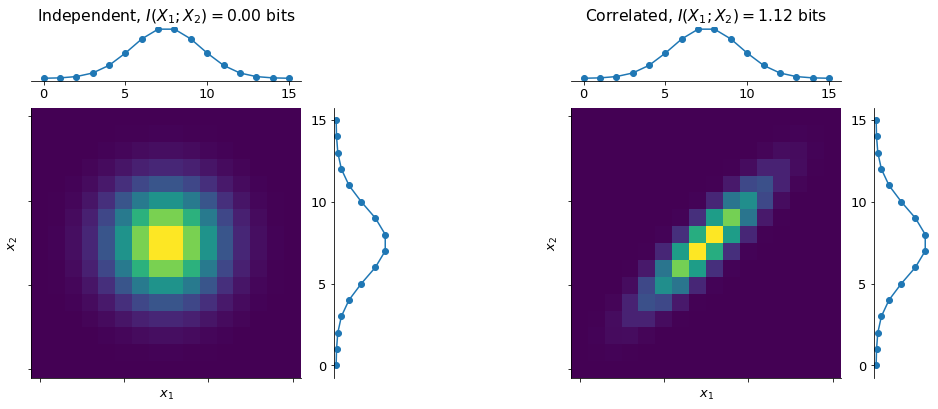

In [8]:
# Generating one independent and one correlated gaussian distribution
N = 16
mu = (N-1) / 2.*np.ones([2, 1])
var = 9.
cov = 8.
cov_ind = np.array([[var, 0.], [0., var]])
cov_cor = np.array([[var, cov], [cov, var]])
[x1, x2,] = np.meshgrid(range(N), range(N))
p_ind = np.zeros([N, N])
p_cor = np.zeros([N, N])
for i in range(N**2):
    x_tmp = np.array([x1.ravel()[i]-mu[0], x2.ravel()[i]-mu[1]])
    p_ind.ravel()[i] = np.exp(-1/2 * np.dot(x_tmp.T, np.dot(np.linalg.inv(cov_ind), x_tmp)))
    p_cor.ravel()[i] = np.exp(-1/2 * np.dot(x_tmp.T, np.dot(np.linalg.inv(cov_cor), x_tmp)))
p_ind /= p_ind.sum()
p_cor /= p_cor.sum()
    
# Calculate I(X1;X2)
p1_ind = p_ind.sum(axis=1)
p2_ind = p_ind.sum(axis=0)
mi_ind = -np.sum(p1_ind*np.log2(p1_ind)) - np.sum(p2_ind*np.log2(p2_ind)) + np.sum(p_ind*np.log2(p_ind))
p1_cor = p_cor.sum(axis=1)
p2_cor = p_cor.sum(axis=0)
mi_cor = -np.sum(p1_cor*np.log2(p1_cor)) - np.sum(p2_cor*np.log2(p2_cor)) + np.sum(p_cor[p_cor>0]*np.log2(p_cor[p_cor>0]))
    
# Plotting
titles = ['Independent', 'Correlated']
p = [p_ind, p_cor]
mi = [mi_ind, mi_cor]
x_ticks = [0, 5, 10, 15]
fig = plt.figure(figsize=(15, 7.5))
for idx, p_tmp in enumerate(p):
    ax = fig.add_axes([0.1 + idx*0.5, 0.1, 0.25, 0.5])
    ax.imshow(p_tmp.reshape(N, N))
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([])
    ax.set_xlabel('$x_1$')
    ax.set_yticks(x_ticks)
    ax.set_yticklabels([])
    ax.set_ylabel('$x_2$')
    ax.invert_yaxis()
    plt.draw()
    pos = ax.get_position()
    ax = fig.add_axes([pos.x0, 0.65, pos.x1-pos.x0, 0.1])
    ax.plot(range(N), p_tmp.sum(axis=1), 'o-')
    ax.set_xticks(x_ticks)
    ax.get_yaxis().set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(titles[idx] + ', $I(X_1;X_2) = %3.2f$ bits' % mi[idx])
    ax = fig.add_axes([pos.x1 + 0.03, 0.1, 0.1/2, 0.5])
    ax.plot(p_tmp.sum(axis=0), range(N), 'o-')
    ax.set_yticks(x_ticks)
    ax.get_xaxis().set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
print('H(X1): %3.2f bits' % -np.sum(p1_cor*np.log2(p1_cor)))
print('H(X2): %3.2f bits' % -np.sum(p2_cor*np.log2(p2_cor)))
print('H(X1,X2)_ind: %3.2f bits' % -np.sum(p_ind*np.log2(p_ind)))
print('H(X1,X2)_cor: %3.2f bits' % -np.sum(p_cor[p_cor>0]*np.log2(p_cor[p_cor>0])))

Another way of understanding why mutual information measures correlation is to look at the expression $I(X;Y) = H(X) + H(Y) - H(X,Y)$, from which we observe that the joint entropy $H(X,Y)$ is subtracted from the sum of the individual entropies. As entropy increases with uncertainty (or possible outcomes), we can infer that a less spread out joint distribution will cause a smaller subtraction. Importantly, however, the shape of the joint distribution does not matter, only how concentrated the probability mass is to a small number of outcomes. This is an important distinction that makes mutual information a general measure of correlation, in contrast to the commonly used correlation coefficients (Pearson's r), which only captures linear correlations. The example below highlight this by calculating the mutual information and the correlation coefficient for both a linear and quadratic relationship between $x$ and $y$.

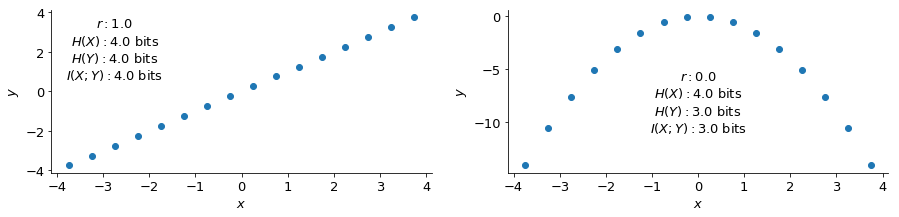

In [9]:
# Generate y responses as y = f(x) for 16 x values with f(x) being either f(x)=x or f(x) = -x^2
x = np.arange(-3.75, 4, 0.5)
y = [x, -x**2]

# Entropies, mutual information, correlation coefficients
Hx = [np.log2(x.size), np.log2(x.size)]  # Assume each x-value is equally likely
Hy = [np.log2(np.unique(y_tmp).size) for y_tmp in y]
mi = Hy  # H(Y|X) = 0 as there is no noise, thus I = H(Y) 
r = [pearsonr(x, y_tmp)[0] for y_tmp in y]

# Plotting
fig = plt.figure(figsize=(15, 3))
for i in range(len(y)): 
    ax = plt.subplot(1, len(y), i+1)
    ax.plot(x, y[i], 'o')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    info = '$r: %2.1f$\n$H(X): %2.1f$ bits\n$H(Y): %2.1f$ bits\n$I(X;Y): %2.1f$ bits' % (r[i], Hx[i], Hy[i], mi[i])
    ax.text(x[2]-i*x[2], y[i].max()-i*5, info, va='top', ha='center')

The mutual information retains its maximum value in both cases (remember that it is bounded from above by min[H(x), H(y)]), whereas the correlation coefficient indicates maximal correlation for the linear $f$ and no correlation for the quadratic $f$. Additionally, the quadratic example provides a nice description of how the mutual information can be interpreted: If we learn 3 bits of information by observing $y$, then our uncertainty about $x$ is one bit $H(X) - I(X;Y)$. This, in turn, corresponds to a choice between two equally likely alternatives, a condition that simply reflects that there are two different $x$-values mapping onto the same $y$-value.